# Dominant Color Extraction for Image Segmentation
- Image Segmentation
- 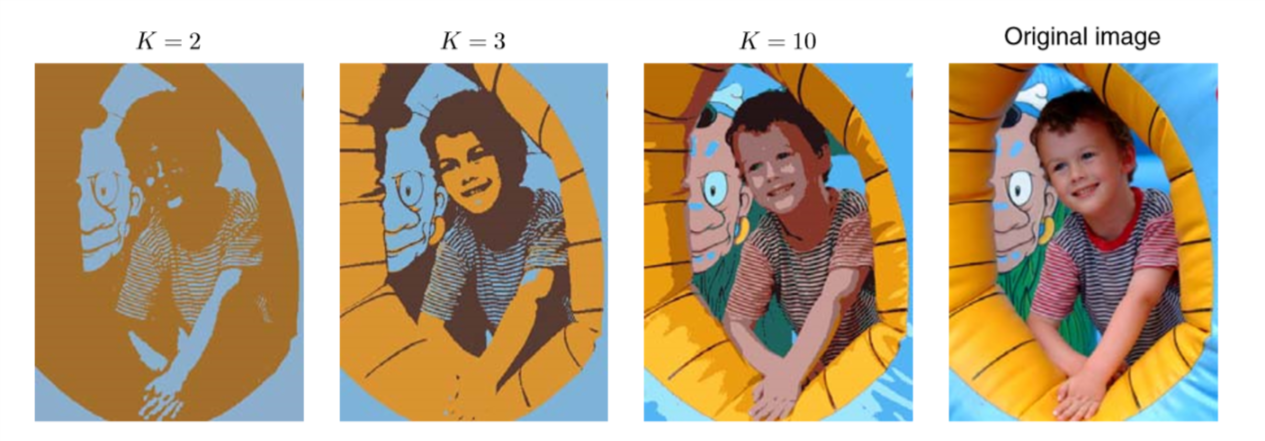
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [13]:
im=cv2.imread("elephant.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


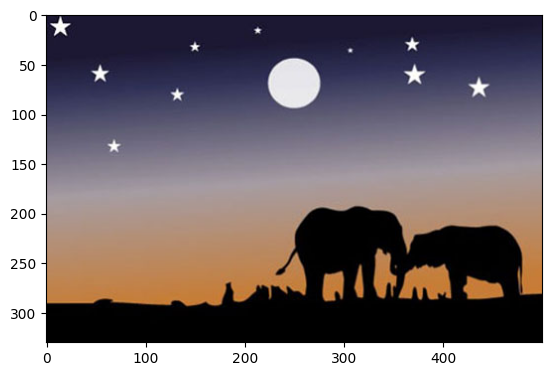

In [14]:
plt.imshow(im)
plt.show()

In [15]:
#flatten each channel of the image
all_pixels=im.reshape((330*500,3))
print(all_pixels.shape)


(165000, 3)


In [16]:
from sklearn.cluster import KMeans

In [17]:
dominant_colors=4
km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [18]:
centers=km.cluster_centers_

In [19]:
centers=np.array(centers,dtype='uint8')
print(centers)

[[  1   1   1]
 [151 139 146]
 [ 49  46  75]
 [187 133  87]]


# PLOT colors

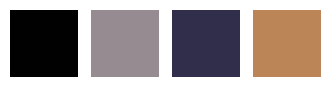

In [20]:
i=1
plt.figure(0,figsize=(4,2))
colors=[]
for j in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(j)
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=j
    plt.imshow(a)
plt.show()

# Segmenting our original image

In [21]:
new_img=np.zeros((330*500,3),dtype='uint8')
labels=km.labels_

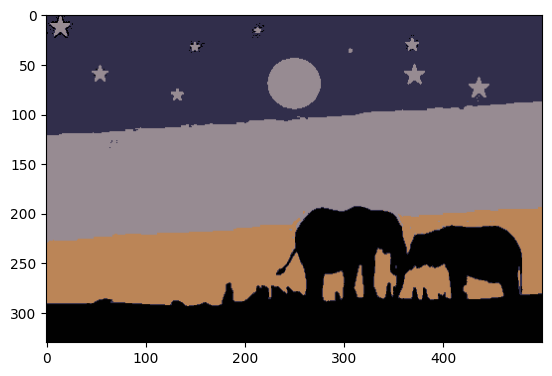

In [22]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[labels[ix]]
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
# on second run will show diff rsults as new_img has already been re4shaped